# Neural Nets

In [74]:
import torch
import torch.nn as nn

## Linear Classifier

In [75]:
linear_classifier = nn.Linear(2,1)
linear_classifier

Linear(in_features=2, out_features=1, bias=True)

In [76]:
linear_classifier.weight

Parameter containing:
tensor([[-0.2690,  0.3319]], requires_grad=True)

In [78]:
linear_classifier.bias

Parameter containing:
tensor([0.1120], requires_grad=True)

In [26]:
linear_classifier = nn.Linear(4,2)
linear_classifier

Linear(in_features=3, out_features=2, bias=True)

In [27]:
linear_classifier.weight

Parameter containing:
tensor([[-0.3418, -0.3605, -0.5611],
        [-0.5297,  0.0107,  0.5607]], requires_grad=True)

In [25]:
linear_classifier.bias

Parameter containing:
tensor([0.3297], requires_grad=True)

In [4]:
linear_classifier = nn.Linear(2,2)
linear_classifier

Linear(in_features=2, out_features=2, bias=True)

In [5]:
linear_classifier.weight

Parameter containing:
tensor([[-0.4049, -0.5235],
        [ 0.3521,  0.1972]], requires_grad=True)

## Training the Classifier

Getting the optimal values of `W` and `b` from initially randomly initialized values of W and b

### Initial Random Values of W and b.

In [82]:
model = nn.Linear(3,2)

In [83]:
model.weight

Parameter containing:
tensor([[-3.7330e-04,  5.5458e-01,  2.8945e-01],
        [-5.6737e-02,  3.4850e-01,  3.5098e-01]], requires_grad=True)

In [84]:
model.weight.shape

torch.Size([2, 3])

In [85]:
model.weight.T.shape

torch.Size([3, 2])

In [86]:
model.bias

Parameter containing:
tensor([ 0.4262, -0.4717], requires_grad=True)

In [87]:
model.bias.shape

torch.Size([2])

### Loss function

In [29]:
loss = nn.MSELoss()

### Dummy Input

In [80]:
input_vec = torch.randn(3)
input_vec

tensor([ 0.7857,  1.1563, -0.9345])

### Dummy Output

In [81]:
output_vec = torch.tensor([0,1])
output_vec

tensor([0, 1])

In [88]:
prediction = model(input_vec)

In [37]:
prediction

tensor([-0.5480,  0.1118,  0.0178], grad_fn=<AddBackward0>)

In [39]:
output_vec

tensor([0, 0, 1])

In [93]:
linear_classifier = nn.Linear(1,1,bias=False)
linear_classifier

Linear(in_features=1, out_features=1, bias=False)

In [94]:
linear_classifier.weight

Parameter containing:
tensor([[0.6890]], requires_grad=True)

In [95]:
linear_classifier.bias

In [96]:
input_vec = torch.randn(1)
input_vec

tensor([0.6562])

In [98]:
prediction = linear_classifier(input_vec)
prediction

tensor([0.4521], grad_fn=<SqueezeBackward4>)

In [99]:
0.6562*0.68

0.44621600000000006

In [100]:
output_vec = torch.tensor([1])
output_vec

tensor([1])

# Training Process - Optimization

**Find the weight matrix `W`**

In other words, find all the values of W matrix so the model prediction is almost similar to the truth.


- Initialize the Model - `f(X,W,b)` with
    - random weight: W
    - random bias: b
- Feed training data to model and get predictions
- Compute the loss between `predictions` and `truth` from training data
- Training
    - Modify the weights and biases `W` and `b` according to the loss.
        - Loss has to be minimized
        - Use Gradient Descent optimization(https://en.wikipedia.org/wiki/Gradient_descent)
- Store the optimal `W` and `b`

# Optimzation and Gradient Descent

### Initialize the random W and b

In [40]:
model = nn.Linear(4,2)

In [41]:
model.weight

Parameter containing:
tensor([[-0.1222, -0.2877, -0.3980, -0.3805],
        [-0.2446,  0.3608,  0.1988, -0.0183]], requires_grad=True)

In [42]:
model.bias

Parameter containing:
tensor([-0.3096,  0.2399], requires_grad=True)

# Loss and optimizer

In [43]:
criterion = nn.MSELoss()

In [46]:
#Weights and bias
model.parameters()

<generator object Module.parameters at 0x12f32edc0>

In [45]:
omptimzer = torch.optim.SGD(model.parameters(), lr=0.1)

In [47]:
#nn.Linear(4,2)
input_vector = torch.Tensor([0.8,0.4,0.4,0.2])

In [51]:
output_vector = torch.Tensor([1,0])
output_vector

tensor([1., 0.])

In [50]:
prediction = model(input_vector)
prediction

tensor([-0.7578,  0.2643], grad_fn=<AddBackward0>)

In [52]:
loss = criterion(output_vector,prediction)

In [53]:
loss.backward() #GD
omptimzer.step() #Weight update #w - (dL/dw)

Parameter containing:
tensor([[-0.1222, -0.2877, -0.3980, -0.3805],
        [-0.2446,  0.3608,  0.1988, -0.0183]], requires_grad=True)

In [54]:
model.weight

Parameter containing:
tensor([[ 0.0184, -0.2174, -0.3277, -0.3453],
        [-0.2658,  0.3502,  0.1882, -0.0236]], requires_grad=True)

In [56]:
for _ in range(10):
    prediction = model(input_vector)
    loss = criterion(output_vector,prediction)
    loss.backward()
    omptimzer.step()

In [57]:
model.weight

Parameter containing:
tensor([[-2.2466, -1.3499, -1.4602, -0.9116],
        [ 0.0748,  0.5205,  0.3585,  0.0615]], requires_grad=True)

In [58]:
model(input_vector)

tensor([-6.0688,  1.0629], grad_fn=<AddBackward0>)

# Neuron

In [59]:
neuron = nn.Linear(3,1,bias=False)

In [61]:
neuron.weight

Parameter containing:
tensor([[ 0.0525, -0.1749,  0.4326]], requires_grad=True)

# Neural Net

In [64]:
neuron = nn.Linear(3,1,bias=False)
neural_net = nn.Sequential(
    neuron,
    nn.ReLU(), 
)

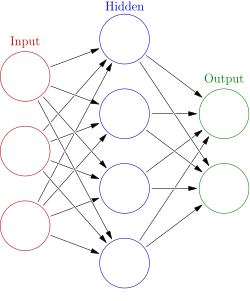

# Linear

In [101]:
input_layer = nn.Linear(3,4,bias=False)
hidden_layer = nn.Linear(4,2,bias=False)
neural_net = nn.Sequential(
    input_layer,
    hidden_layer
)
neural_net

Sequential(
  (0): Linear(in_features=3, out_features=4, bias=False)
  (1): Linear(in_features=4, out_features=2, bias=False)
)

In [109]:
neural_net(torch.Tensor([1,2,3]))

tensor([-1.3132, -0.3993], grad_fn=<SqueezeBackward4>)

In [107]:
from torchsummary import summary


summary(neural_net,input_size=(1,3))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 4]              12
            Linear-2                 [-1, 1, 2]               8
Total params: 20
Trainable params: 20
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


# Non Linear

In [110]:
input_layer = nn.Linear(3,4,bias=False)
hidden_layer = nn.Linear(4,2,bias=False)
neural_net = nn.Sequential(
    input_layer,
    nn.ReLU(),
    hidden_layer
)
neural_net

Sequential(
  (0): Linear(in_features=3, out_features=4, bias=False)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=2, bias=False)
)

In [65]:
neuron1 = nn.Linear(3,2,bias=False)
neuron2 = nn.Linear(2,1,bias=False)
neural_net = nn.Sequential(
    neuron1,
    neuron2
)


In [66]:
neural_net

Sequential(
  (0): Linear(in_features=3, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=1, bias=True)
)

In [70]:
neuron1 = nn.Linear(3,2,bias=False)
neuron2 = nn.Linear(2,1,bias=False)
neural_net = nn.Sequential(
    neuron1,
    nn.ReLU(),
    neuron2
)

In [69]:
#neural_net

In [71]:
#nn.Linear(3,2)
input_vector = torch.Tensor([0.8,0.4,0.4])

output_vector = torch.Tensor([1])

In [72]:
neural_net(input_vector)

tensor([0.1156], grad_fn=<SqueezeBackward4>)

In [73]:
for _ in range(10):
    prediction = neural_net(input_vector)
    loss = criterion(output_vector,prediction)
    loss.backward()
    omptimzer.step()

In [149]:
input_layer = nn.Linear(3,4,bias=False)
hidden_layer = nn.Linear(4,2,bias=False)
neural_net = nn.Sequential(
    input_layer,
    nn.ReLU(),
    hidden_layer
)
neural_net

Sequential(
  (0): Linear(in_features=3, out_features=4, bias=False)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=2, bias=False)
)

In [150]:
next(neural_net.parameters())

Parameter containing:
tensor([[-0.3213, -0.3915,  0.1960],
        [-0.4460, -0.5207, -0.1165],
        [ 0.1044,  0.0806,  0.3573],
        [ 0.4040, -0.4033, -0.0866]], requires_grad=True)

In [151]:
for each_w in neural_net.parameters():
    print(each_w)

Parameter containing:
tensor([[-0.3213, -0.3915,  0.1960],
        [-0.4460, -0.5207, -0.1165],
        [ 0.1044,  0.0806,  0.3573],
        [ 0.4040, -0.4033, -0.0866]], requires_grad=True)
Parameter containing:
tensor([[-0.0106, -0.1820, -0.1123,  0.0468],
        [-0.1590,  0.1972,  0.1872,  0.2032]], requires_grad=True)


In [152]:
#Mean squared loss
criterion = nn.MSELoss()

In [153]:
#Input
input_vector  = torch.Tensor([0.8,0.4,0.4])
#Ground Truth
output_vector = torch.Tensor([1,2])
#Gradient Descent
#W-(dl/dw)
omptimzer = torch.optim.SGD(neural_net.parameters(), lr=0.1)
#I want to train the model
neural_net.train()
epoch = 1000
for _ in range(epoch):
    #Prediction from model
    prediction = neural_net(input_vector)
    #Mean squared loss
    loss = criterion(output_vector,prediction)
    #Backpropagation(Gradients computed)
    loss.backward()
    #W_new = W_old -(Grad)
    omptimzer.step()

In [154]:
for each_w in neural_net.parameters():
    print(each_w)

Parameter containing:
tensor([[-3.2133e-01, -3.9151e-01,  1.9604e-01],
        [-4.4597e-01, -5.2068e-01, -1.1646e-01],
        [-1.2354e+02, -6.1740e+01, -6.1463e+01],
        [-1.1337e+03, -5.6746e+02, -5.6714e+02]], requires_grad=True)
Parameter containing:
tensor([[-1.0589e-02, -1.8198e-01,  2.8551e+02,  1.3703e+02],
        [-1.5903e-01,  1.9725e-01,  4.1908e+02,  1.8236e+02]],
       requires_grad=True)


In [135]:
neural_net(input_vector)

tensor([0., 0.], grad_fn=<SqueezeBackward4>)

In [142]:
next(neural_net.parameters())

Parameter containing:
tensor([[-1.9351e-02, -5.1931e-01, -3.6478e-01],
        [-2.5555e-01, -2.1072e-01, -8.5792e-02],
        [-3.4026e+02, -1.6984e+02, -1.6973e+02],
        [-1.4306e+02, -7.1519e+01, -7.1380e+01]], requires_grad=True)

# Activation Functions
- Relu - Hidden Layers(https://en.wikipedia.org/wiki/Rectifier_(neural_networks))
- Softmax - Probabilities used in the output layer for classfication

In [156]:
input_layer = nn.Linear(3,4,bias=False)
hidden_layer = nn.Linear(4,2,bias=False)
neural_net = nn.Sequential(
    input_layer,
    nn.ReLU(),
    hidden_layer,
    nn.Softmax()
)
neural_net

Sequential(
  (0): Linear(in_features=3, out_features=4, bias=False)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=2, bias=False)
  (3): Softmax(dim=None)
)

In [157]:
neural_net(input_vector)

/Users/satyapattnaik/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor([0.5245, 0.4755], grad_fn=<SoftmaxBackward0>)

In [158]:
input_layer = nn.Linear(3,4,bias=False)
hidden_layer = nn.Linear(4,2,bias=False)
neural_net = nn.Sequential(
    input_layer,
    nn.ReLU(),
    hidden_layer,
    
)
neural_net

Sequential(
  (0): Linear(in_features=3, out_features=4, bias=False)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=2, bias=False)
)

In [159]:
neural_net(input_vector)

tensor([0.0080, 0.0624], grad_fn=<SqueezeBackward4>)